In [15]:
!rm -rf forestfire_prediction
!git clone https://github.com/akshatha-s13/forestfire_prediction.git
!pip install pandas

Cloning into 'forestfire_prediction'...
remote: Enumerating objects: 83, done.
remote: Counting objects: 100% (83/83), done.
remote: Compressing objects: 100% (70/70), done.
remote: Total 83 (delta 13), reused 51 (delta 5), pack-reused 0
Unpacking objects: 100% (83/83), done.


In [0]:
from math import sqrt
from matplotlib import pyplot
import pandas as pd
from sklearn.metrics import mean_squared_error
from pandas.tools.plotting import autocorrelation_plot
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA

DATE              object
TempAvg          float64
Humidity           int64
Precipitation    float64
WindSpeed        float64
dtype: object


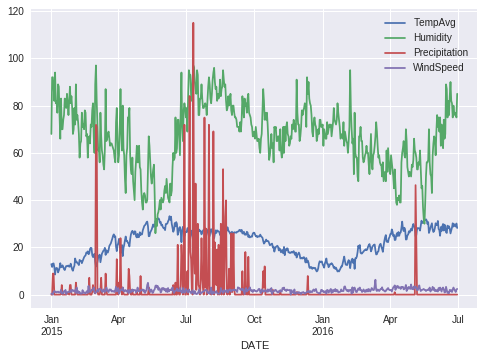

In [30]:
df = pd.read_csv("forestfire_prediction/datasets/climate-data/dehradun.csv")
df = df[["DATE","TempAvg","Humidity","Precipitation","WindSpeed"]]
print(df.dtypes)
df['DATE'] = pd.to_datetime(df.DATE , format = '%d-%m-%Y')
data = df.drop(['DATE'], axis=1)
data.index = df.DATE
cols = data.columns
data.plot()
pyplot.show()

**Autocorrelation Plot,Model Summary,Residual Errors Featurewise**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  """Entry point for launching an IPython kernel.


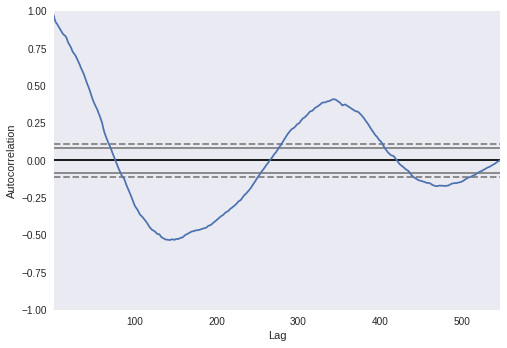

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:              D.TempAvg   No. Observations:                  546
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -938.333
Method:                       css-mle   S.D. of innovations              1.349
Date:                Fri, 26 Oct 2018   AIC                           1890.666
Time:                        20:31:40   BIC                           1920.784
Sample:                    01-02-2015   HQIC                          1902.439
                         - 06-30-2016                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0296      0.033      0.885      0.376      -0.036       0.095
ar.L1.D.TempAvg    -0.1516      0.043     -3.534      0.000      -0.236      -0.068
ar.L2.D.TempAvg    -0.1811      

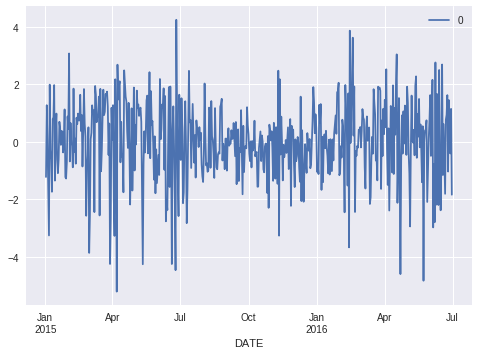

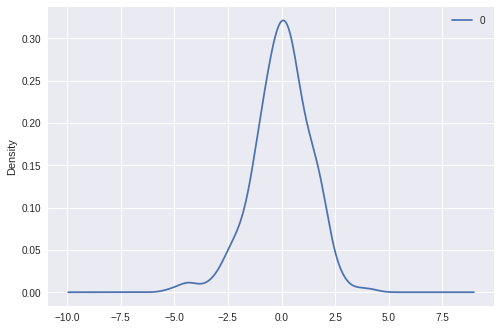

                0
count  546.000000
mean    -0.000820
std      1.350497
min     -5.218554
25%     -0.748078
50%      0.055385
75%      0.865622
max      4.239916


In [31]:
autocorrelation_plot(data[["TempAvg"]])
pyplot.show()
model = ARIMA(data[["TempAvg"]], order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  """Entry point for launching an IPython kernel.


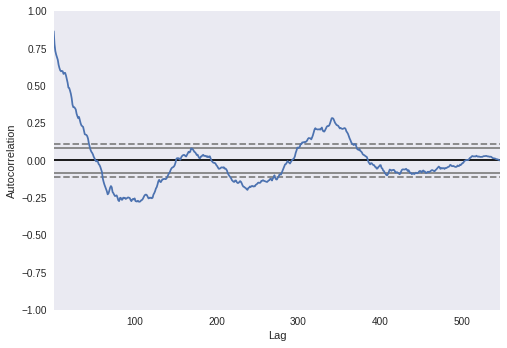

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:             D.Humidity   No. Observations:                  546
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1827.292
Method:                       css-mle   S.D. of innovations              6.872
Date:                Fri, 26 Oct 2018   AIC                           3668.584
Time:                        20:31:46   BIC                           3698.703
Sample:                    01-02-2015   HQIC                          3680.358
                         - 06-30-2016                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0032      0.147      0.022      0.983      -0.284       0.290
ar.L1.D.Humidity    -0.2809      0.043     -6.514      0.000      -0.365      -0.196
ar.L2.D.Humidity    -0.2771 

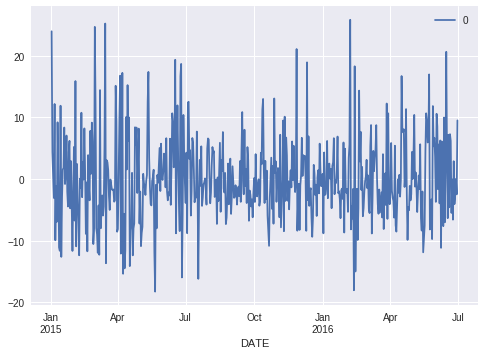

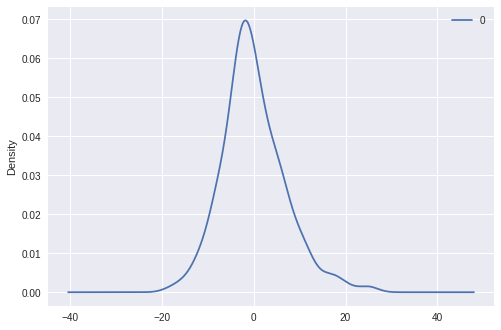

                0
count  546.000000
mean     0.029689
std      6.887721
min    -18.296866
25%     -4.077503
50%     -0.840556
75%      3.872054
max     25.866327


In [32]:
autocorrelation_plot(data[["Humidity"]])
pyplot.show()
model = ARIMA(data[["Humidity"]], order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  """Entry point for launching an IPython kernel.


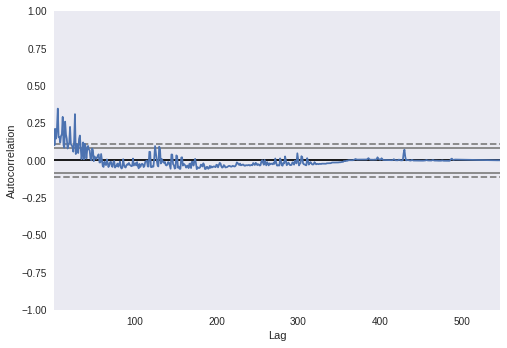

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:        D.Precipitation   No. Observations:                  546
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -2057.920
Method:                       css-mle   S.D. of innovations             10.473
Date:                Fri, 26 Oct 2018   AIC                           4129.841
Time:                        20:31:49   BIC                           4159.959
Sample:                    01-02-2015   HQIC                          4141.614
                         - 06-30-2016                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0056      0.111     -0.051      0.960      -0.224       0.213
ar.L1.D.Precipitation    -0.8255      0.040    -20.389      0.000      -0.905      -0.746
ar.L2.D.

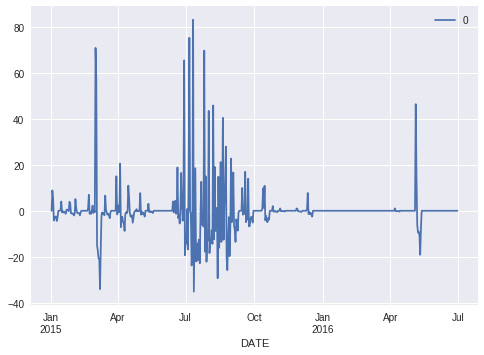

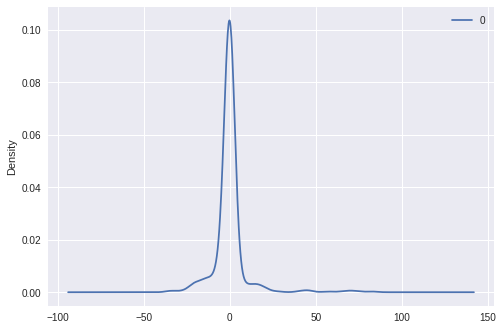

                0
count  546.000000
mean     0.012683
std     10.485305
min    -35.113853
25%     -0.849371
50%      0.022785
75%      0.022785
max     83.026582


In [33]:
autocorrelation_plot(data[["Precipitation"]])
pyplot.show()
model = ARIMA(data[["Precipitation"]], order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  """Entry point for launching an IPython kernel.


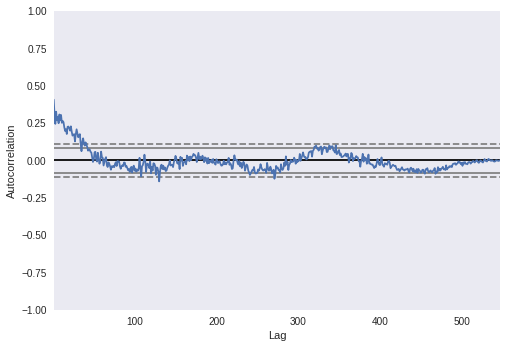

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:            D.WindSpeed   No. Observations:                  546
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -607.240
Method:                       css-mle   S.D. of innovations              0.735
Date:                Fri, 26 Oct 2018   AIC                           1228.481
Time:                        20:31:51   BIC                           1258.599
Sample:                    01-02-2015   HQIC                          1240.254
                         - 06-30-2016                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0027      0.010      0.261      0.794      -0.017       0.023
ar.L1.D.WindSpeed    -0.6662      0.042    -15.807      0.000      -0.749      -0.584
ar.L2.D.WindSpeed    -0.

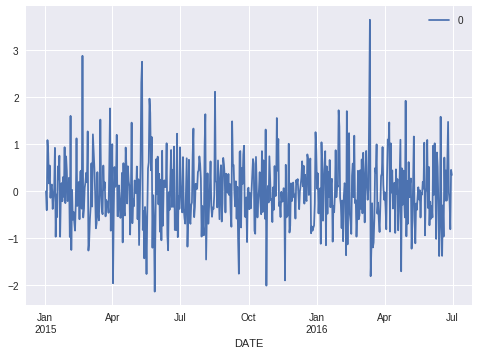

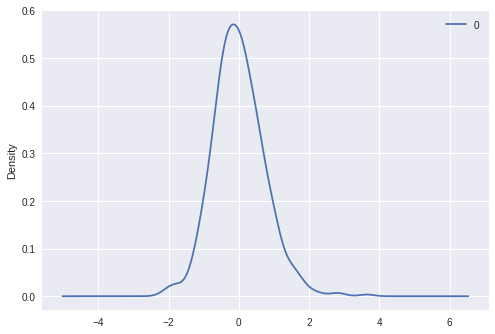

                0
count  546.000000
mean     0.001018
std      0.736201
min     -2.133620
25%     -0.482223
50%     -0.044681
75%      0.441397
max      3.642182


In [34]:
autocorrelation_plot(data[["WindSpeed"]])
pyplot.show()
model = ARIMA(data[["WindSpeed"]], order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

**ARIMA Model Testing for one set of parameters**

predicted=24.170634, expected=25.600000
predicted=25.097259, expected=25.600000
predicted=25.132777, expected=27.600000
predicted=27.014580, expected=26.700000
predicted=26.349257, expected=24.800000
predicted=24.723666, expected=25.300000
predicted=25.569909, expected=23.100000
predicted=23.772627, expected=23.200000
predicted=23.759241, expected=25.100000
predicted=25.394374, expected=26.000000
predicted=25.857262, expected=24.800000
predicted=24.496571, expected=26.500000
predicted=26.108694, expected=24.900000
predicted=24.901754, expected=26.100000
predicted=26.007925, expected=26.300000
predicted=26.304983, expected=28.200000
predicted=27.835966, expected=30.900000
predicted=30.199265, expected=27.900000
predicted=27.385269, expected=26.900000
predicted=26.736885, expected=28.300000
predicted=28.567433, expected=27.400000
predicted=27.825914, expected=23.300000
predicted=23.999714, expected=23.400000
predicted=24.242595, expected=25.100000
predicted=25.805580, expected=25.400000


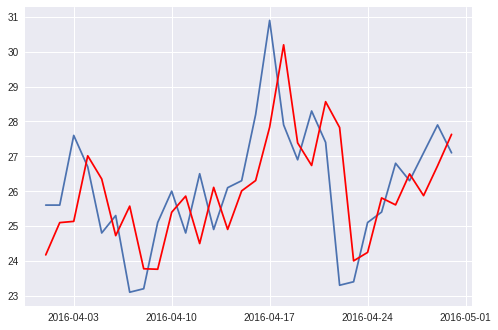

In [56]:
train = data["TempAvg"].loc['01-01-2015':'03-31-2016']
test= data["TempAvg"].loc['04-01-2016':'04-30-2016']
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
pyplot.plot(test.index,test)
pyplot.plot(test.index,predictions,color='r')
pyplot.show()

predicted=51.825743, expected=51.000000
predicted=53.836997, expected=59.000000
predicted=57.508750, expected=56.000000
predicted=55.953911, expected=53.000000
predicted=53.329874, expected=50.000000
predicted=51.565830, expected=45.000000
predicted=47.509207, expected=53.000000
predicted=53.596669, expected=46.000000
predicted=47.708825, expected=39.000000
predicted=42.033964, expected=38.000000
predicted=41.713073, expected=41.000000
predicted=42.073565, expected=40.000000
predicted=41.290162, expected=42.000000
predicted=41.719800, expected=39.000000
predicted=39.102999, expected=39.000000
predicted=38.960230, expected=56.000000
predicted=51.340463, expected=60.000000
predicted=53.628386, expected=62.000000
predicted=55.954182, expected=65.000000
predicted=60.223902, expected=59.000000
predicted=56.722691, expected=58.000000
predicted=58.474842, expected=70.000000
predicted=67.647361, expected=65.000000
predicted=63.510609, expected=54.000000
predicted=56.394050, expected=52.000000


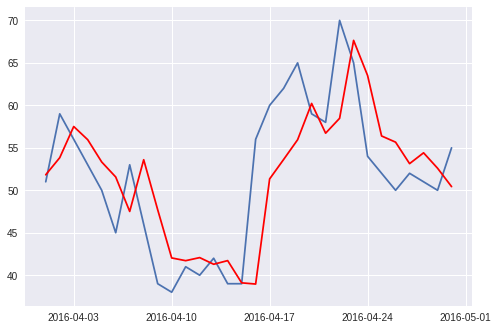

In [57]:
train = data["Humidity"].loc['01-01-2015':'03-31-2016']
test= data["Humidity"].loc['04-01-2016':'04-30-2016']
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
pyplot.plot(test.index,test)
pyplot.plot(test.index,predictions,color='r')
pyplot.show()

predicted=-0.028196, expected=0.000000
predicted=-0.028134, expected=0.000000
predicted=-0.028072, expected=0.000000
predicted=-0.028011, expected=0.000000
predicted=-0.027948, expected=0.000000
predicted=-0.027887, expected=0.000000
predicted=-0.027827, expected=1.020000
predicted=0.131096, expected=0.000000
predicted=0.014192, expected=0.000000
predicted=0.161400, expected=0.000000
predicted=0.082303, expected=0.000000
predicted=0.164104, expected=0.000000
predicted=0.310391, expected=0.000000
predicted=-0.027410, expected=0.000000
predicted=-0.027351, expected=0.000000
predicted=-0.027293, expected=0.000000
predicted=-0.027235, expected=0.000000
predicted=-0.027177, expected=0.000000
predicted=-0.027118, expected=0.000000
predicted=-0.027061, expected=0.000000
predicted=-0.027004, expected=0.000000
predicted=-0.026948, expected=0.000000
predicted=-0.026891, expected=0.000000
predicted=-0.026835, expected=0.000000
predicted=-0.026778, expected=0.000000
predicted=-0.026721, expected=0

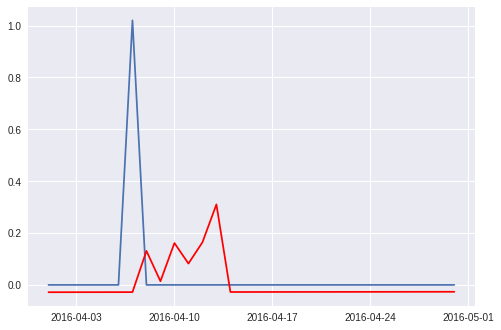

In [58]:
train = data["Precipitation"].loc['01-01-2015':'03-31-2016']
test= data["Precipitation"].loc['04-01-2016':'04-30-2016']
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
pyplot.plot(test.index,test)
pyplot.plot(test.index,predictions,color='r')
pyplot.show()

predicted=2.007648, expected=2.000000
predicted=2.208402, expected=1.900000
predicted=2.076877, expected=1.300000
predicted=1.897905, expected=2.200000
predicted=2.017765, expected=3.100000
predicted=2.336599, expected=3.300000
predicted=2.513628, expected=3.900000
predicted=2.964804, expected=2.000000
predicted=2.418384, expected=3.500000
predicted=3.025829, expected=3.000000
predicted=3.200271, expected=3.700000
predicted=3.225804, expected=2.800000
predicted=3.274726, expected=3.100000
predicted=2.896095, expected=3.100000
predicted=3.279521, expected=2.400000
predicted=2.815037, expected=3.300000
predicted=3.195081, expected=3.100000
predicted=3.029920, expected=3.300000
predicted=3.077225, expected=2.200000
predicted=2.824766, expected=2.400000
predicted=2.621945, expected=3.000000
predicted=2.988577, expected=4.100000
predicted=3.255504, expected=1.500000
predicted=2.545130, expected=3.000000
predicted=2.701221, expected=2.400000
predicted=2.780648, expected=3.300000
predicted=2.

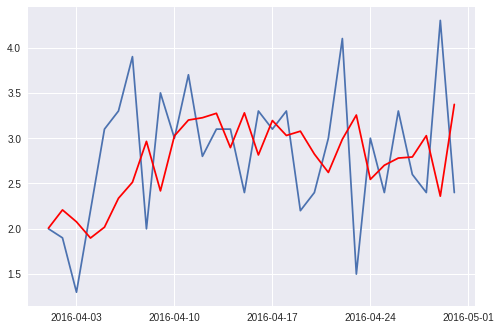

In [59]:
train = data["WindSpeed"].loc['01-01-2015':'03-31-2016']
test= data["WindSpeed"].loc['04-01-2016':'04-30-2016']
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
pyplot.plot(test.index,test)
pyplot.plot(test.index,predictions,color='r')
pyplot.show()

**Parameter Selection for ARIMA Model** 

In [72]:
import warnings
import itertools
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

col="TempAvg"
y=data[col].loc['01-01-2015':'03-31-2016']

# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:4084.4103984978437
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:3462.8363413291772
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2210.4068362224557
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:2158.112637265245
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:2216.358051054044
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:2210.569664838008
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:2161.9517350630804
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:2160.015375625197
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:3495.6267015819576
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2950.3346631772342
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1930.575387980055
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1865.571619955098
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1939.6790575110092
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1938.8311552657603
ARIMA(0, 0, 1)x(1, 1, 0, 

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6174      0.075      8.245      0.000       0.471       0.764
ma.L1         -1.2175      0.083    -14.644      0.000      -1.380      -1.055
ma.S.L12      -0.0059      0.043     -0.137      0.891      -0.091       0.079
sigma2         1.2445      0.174      7.142      0.000       0.903       1.586


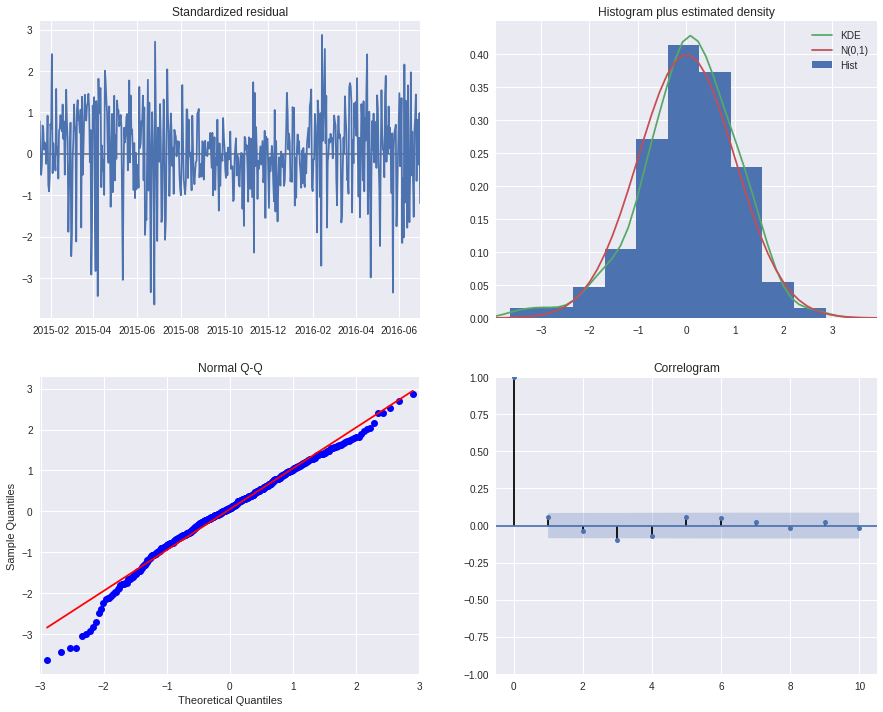

In [65]:
# choose min AIC
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(0, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

results.plot_diagnostics(figsize=(15, 12))
plt.show()

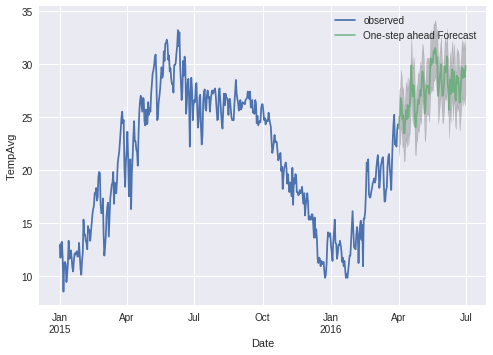

The Mean Squared Error of our forecasts is 2.44


In [69]:
pred = results.get_prediction(start=pd.to_datetime('2016-04-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = y['2015-01-01':'2016-03-31'].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

plt.legend()

plt.show()

y_forecasted = pred.predicted_mean
y_truth = y['2016-04-01':'2016-06-30']

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))